In [1]:
# %% Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# %% Cell 2: Load dataset
data_path = Path('../../datasets/example-runs/sample-10min.csv')
df = pd.read_csv(data_path, parse_dates=['timestamp'])

In [3]:
# %% Cell 3: Calculate statistics
print(f"Records: {len(df)}")
print(f"Avg Cp: {df['cp'].mean():.3f}")
print(f"Avg λ: {df['lambda'].mean():.2f}")

Records: 10
Avg Cp: 0.349
Avg λ: 2.09


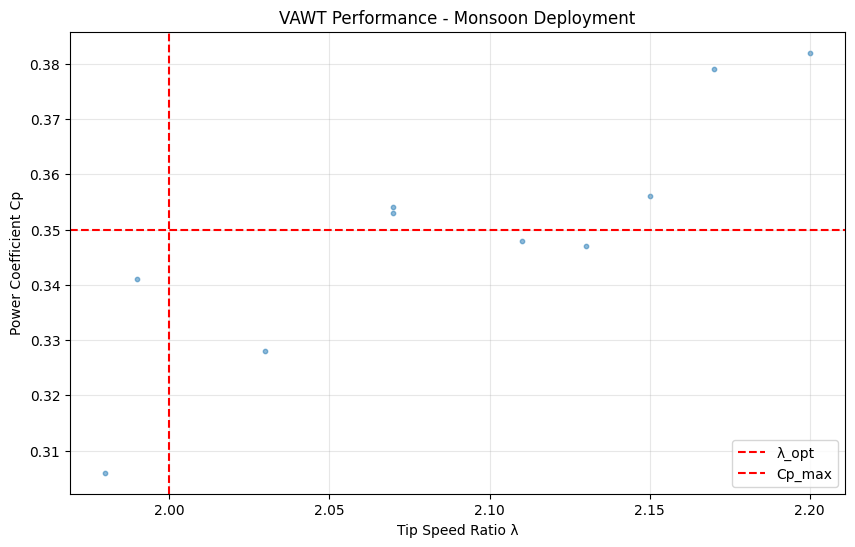

In [4]:
# %% Cell 4: Plot Cp-λ curve
plt.figure(figsize=(10, 6))
plt.scatter(df['lambda'], df['cp'], alpha=0.5, s=10)
plt.axvline(x=2.0, color='r', linestyle='--', label='λ_opt')
plt.axhline(y=0.35, color='r', linestyle='--', label='Cp_max')
plt.xlabel('Tip Speed Ratio λ')
plt.ylabel('Power Coefficient Cp')
plt.title('VAWT Performance - Monsoon Deployment')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('../../docs/figures/cp_lambda_plot.png', dpi=300)
plt.show()

In [5]:
# %% Cell 5: MPPT efficiency
# Filter data near optimal λ (1.8 < λ < 2.2)
optimal_range = df[(df['lambda'] > 1.8) & (df['lambda'] < 2.2)]
avg_cp_optimal = optimal_range['cp'].mean()
mppt_efficiency = (avg_cp_optimal / 0.35) * 100

print(f"MPPT Efficiency: {mppt_efficiency:.1f}%")
print(f"Average Cp near λ_opt: {avg_cp_optimal:.3f}")

MPPT Efficiency: 98.8%
Average Cp near λ_opt: 0.346
